### Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [17]:
df = pd.read_csv("dataset.csv")

### Data overview

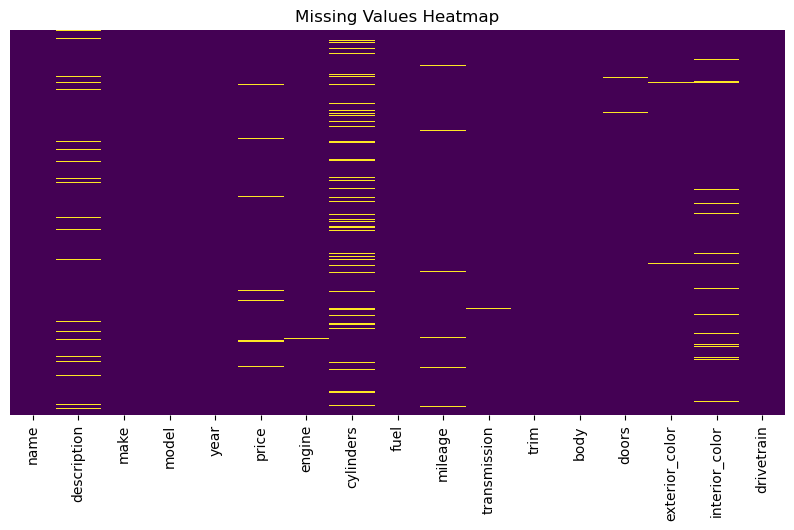

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

display(df.head())
print(df.info())
print(df.describe())

### Handle missing values

In [19]:
imputer = SimpleImputer(strategy='median')
df['price'] = imputer.fit_transform(df[['price']]) 

### Feature Engineering

In [20]:
current_year = datetime.datetime.now().year
df['vehicle_age'] = current_year - df['year']  # Dynamically calculate vehicle age
df.drop(columns=['name', 'description', 'year'], inplace=True) 

### Visualizing price distribution

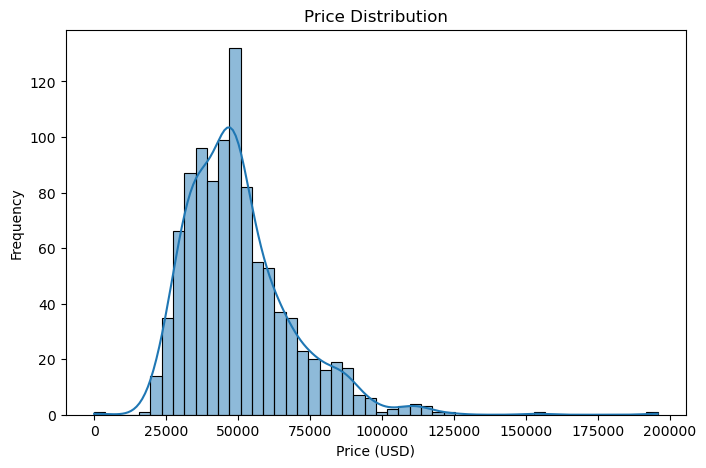

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

### Splitting categorical and numerical features

In [22]:
categorical_features = ['make', 'model', 'engine', 'fuel', 'transmission', 'trim', 'body', 'drivetrain', 'exterior_color', 'interior_color']
numerical_features = ['mileage', 'cylinders', 'doors', 'vehicle_age']

### Preprocessing Pipeline

In [23]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

### Train-Test Split

In [24]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training and Evaluation

In [25]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))
    print("----------------------------")

    # Visualizing actual vs predicted prices
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
    sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Actual vs Predicted Prices - {model.__class__.__name__}")
    plt.show()

### Hyperparameter Tuning with GridSearchCV

In [26]:
param_grid = {
    'RandomForestRegressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'MLPRegressor': {
        'hidden_layer_sizes': [(64, 32), (128, 64)],
        'max_iter': [500, 1000]
    }
}

best_models = {}
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'MLPRegressor': MLPRegressor(random_state=42)
}

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_processed, y_train)
        best_models[model_name] = grid_search.best_estimator_
    else:
        model.fit(X_train_processed, y_train)
        best_models[model_name] = model

/home/sbapan/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sbapan/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sbapan/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sbapan/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sbapan/anaconda3/lib/python3.

### Evaluating Best Models

LinearRegression Performance:
MAE: 4739.654470303108
MSE: 59040677.975775875
RMSE: 7683.793202304177
R² Score: 0.7683795361434924
----------------------------


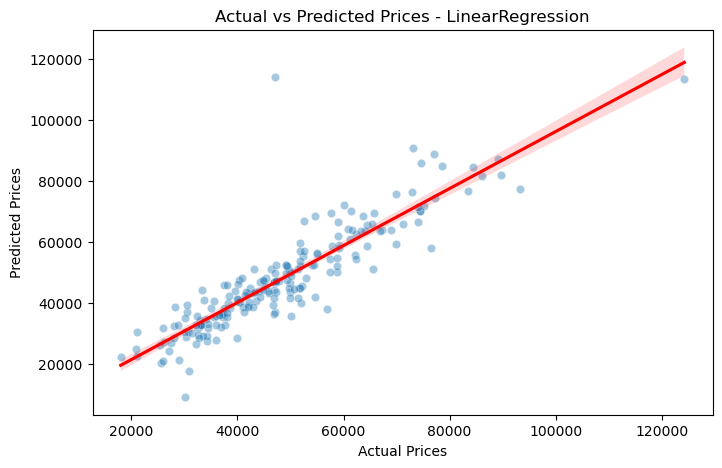

RandomForestRegressor Performance:
MAE: 4133.029040989853
MSE: 55949216.225436285
RMSE: 7479.920870265693
R² Score: 0.7805075439706061
----------------------------


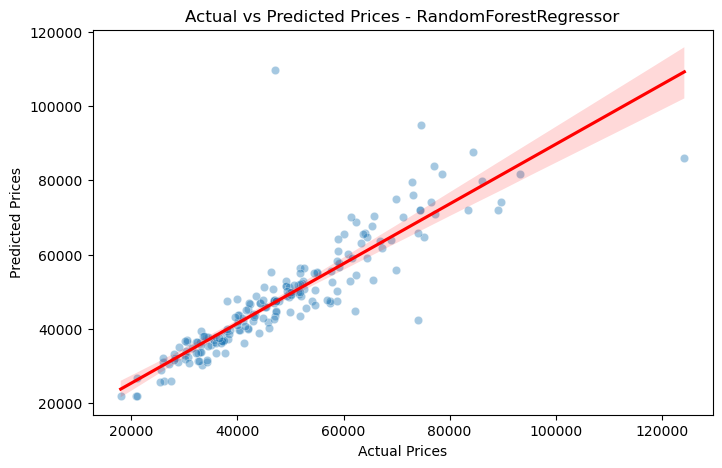

GradientBoostingRegressor Performance:
MAE: 4180.534226828839
MSE: 54586045.156976074
RMSE: 7388.236945102402
R² Score: 0.7858553537522293
----------------------------


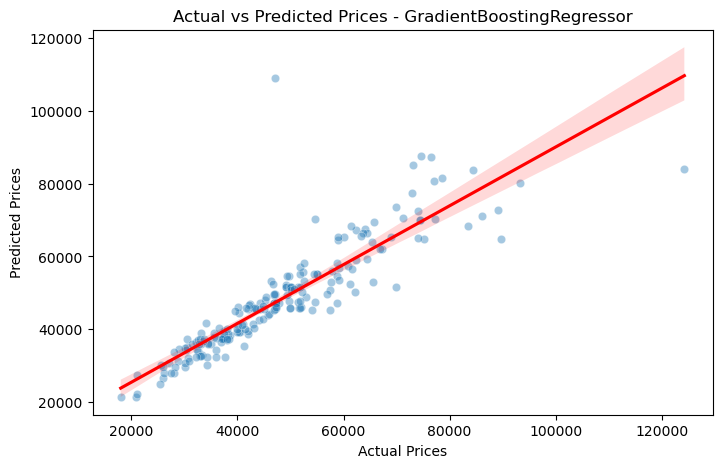

In [ ]:
for model_name, model in best_models.items():
    evaluate_model(model, X_train_processed, X_test_processed, y_train, y_test)

### Feature Importance for Tree-Based Models

In [ ]:
rf = best_models['RandomForestRegressor']
feature_importance = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

In [ ]:
# Sorting feature importance
sorted_indices = np.argsort(feature_importance)[::-1]
feature_importance = feature_importance[sorted_indices]
feature_names = feature_names[sorted_indices]

plt.figure(figsize=(14, 8))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Random Forest Feature Importance", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
num_features = 20  
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[:num_features], y=feature_names[:num_features], palette="viridis")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 20 Most Important Features", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
num_features = 20  
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[:num_features], y=feature_names[:num_features], palette="viridis")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 20 Most Important Features", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()